# CSE 4038 - Computer Vision in Health Care Lab

### Name: V Padmaja
### RegNo: 19BAI1107
### Lab Experiment 3: Edge Detection Techniques

### Mounting the drive

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Importing Necessary Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter
from skimage.util import random_noise
from skimage.color import rgb2gray
from skimage.color import gray2rgb
import skimage.io
from google.colab.patches import cv2_imshow

## Original Image

### Reading and Displaying the Image

In [3]:
image = cv2.imread('/content/gdrive/MyDrive/IDRiD_13.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

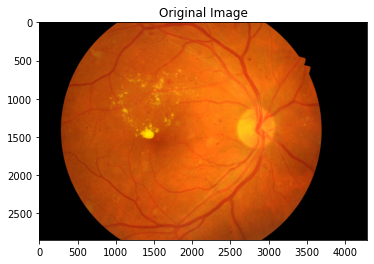

In [4]:
plt.title("Original Image")
plt.imshow(image)

### Converting to GrayScale

Text(0.5, 1.0, 'Gray Scale')

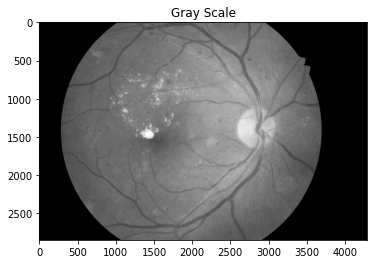

In [5]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")
plt.title("Gray Scale")

## Gaussian Blur

Text(0.5, 1.0, 'Gray Scale')

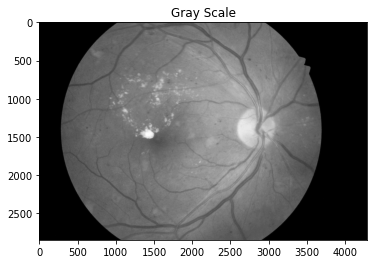

In [6]:
gauss = cv2.GaussianBlur(img, (5,5), 2)
plt.imshow(gauss, cmap="gray")
plt.title("Gray Scale")

## Sobel Operator for Edge Detection

In [7]:
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=1)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=1)
sobelxy = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=1) 

## Visualizing Sobel for Kernel size 1

Text(0.5, 1.0, 'Sobel XY')

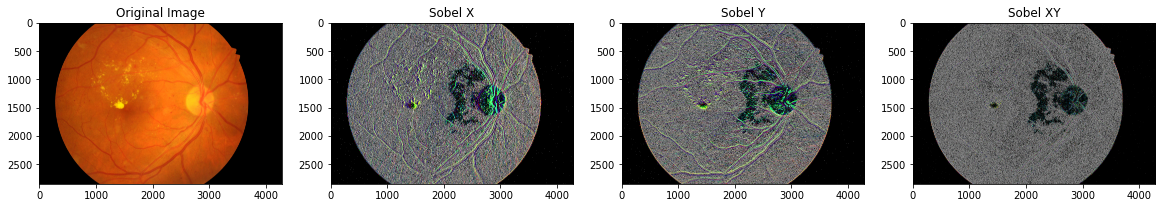

In [8]:
fig, ax = plt.subplots(1,4, figsize=(20,20))

ax[0].imshow(image.astype('uint8'), cmap="gray");
ax[1].imshow(sobelx.astype('uint8') , cmap="gray");
ax[2].imshow(sobely.astype('uint8'), cmap="gray");
ax[3].imshow(sobelxy.astype('uint8'), cmap="gray");



ax[0].set_title('Original Image')
ax[1].set_title('Sobel X')
ax[2].set_title('Sobel Y')
ax[3].set_title('Sobel XY')


## Comparing and Varying Parameters (Kernel Size) 

In [9]:
sobelx_3 = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=1) # Sobel Edge
sobely_3 = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=1) # Sobel Edge
sobelxy_3 = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=1) # Combined X

sobelx_5 = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge
sobely_5 = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge
sobelxy_5 = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X

sobelx_7 = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge
sobely_7 = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge
sobelxy_7 = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X

In [10]:
titles = ['Sobel X Kernel Size: 1','Sobel Y Kernel Size: 1','Sobel XY Kernel Size: 1','Sobel X Kernel Size: 3','Sobel Y Kernel Size: 3','Sobel XY Kernel Size: 3','Sobel X Kernel Size: 5','Sobel Y Kernel Size: 5','Sobel XY Kernel Size: 5']
images = [sobelx_3,sobely_3,sobelxy_3,sobelx_5,sobely_5,sobelxy_5,sobelx_7,sobely_7,sobelxy_7]

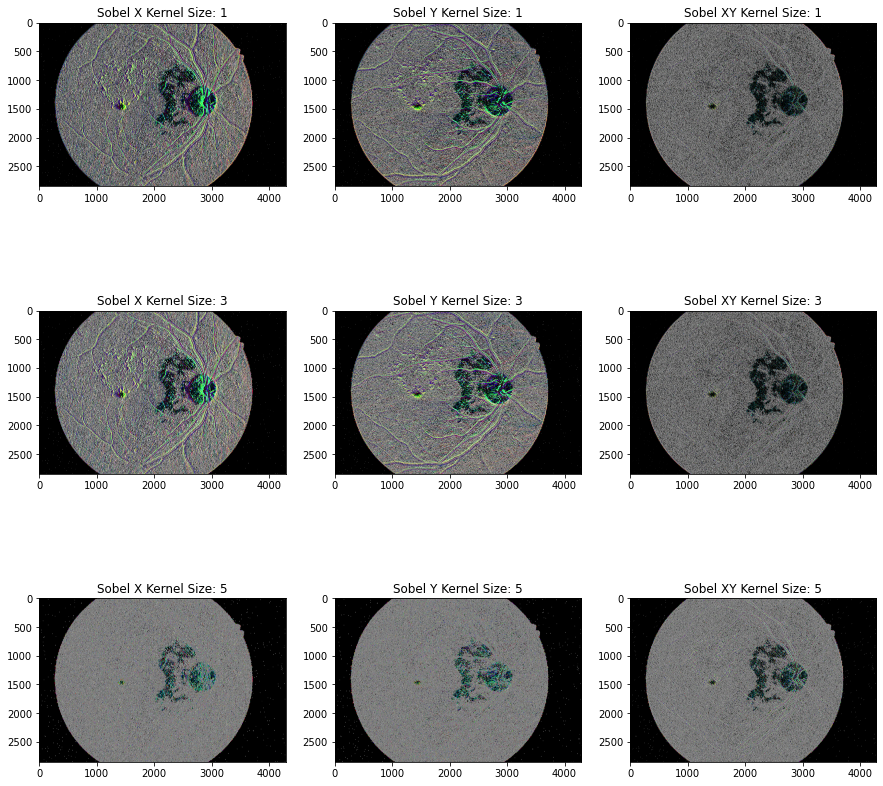

In [11]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1),plt.imshow(images[i].astype('uint8'),'gray',vmin=0,vmax=255)
    plt.title(titles[i])
plt.show()

### Inference: The sobel operater seems to perform bext when the kernel size is less. Hence when the kernel equals 1 we obtain best results. Sobel in X - dx and Y - dy directions also perform better with lesser kernel size

## Prewitt operator for Edge Detection



In [12]:
kernelx = np.array([[50,50,50],[0,0,0],[-50,-50,-50]])
kernely = np.array([[-50,0,50],[-50,0,50],[-50,0,50]])

img_prewittx = cv2.filter2D(gauss, -1, kernelx)
img_prewitty = cv2.filter2D(gauss, -1, kernely)

## Visualizing Prewitt ( Kernel array = 50)

Text(0.5, 1.0, 'Prewitt - y')

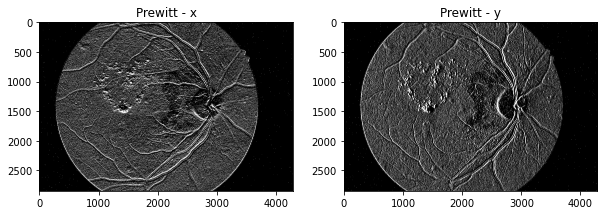

In [13]:
fig, ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(img_prewittx, cmap="gray");
ax[1].imshow(img_prewitty, cmap="gray");

ax[0].set_title('Prewitt - x')
ax[1].set_title('Prewitt - y')

## Comparing and Varying Parameters (Kernel)

In [14]:
kernelx = np.array([[20,20,20],[0,0,0],[-20,-20,-20]])
kernely = np.array([[-20,0,20],[-20,0,20],[-20,0,20]])
kernelx1 = np.array([[100,100,100],[0,0,0],[-100,-100,-100]])
kernely2 = np.array([[-100,0,100],[-100,0,100],[-100,0,100]])

img_prewittx = cv2.filter2D(gauss, -1, kernelx)
img_prewitty = cv2.filter2D(gauss, -1, kernely)
img_prewittx1= cv2.filter2D(gauss, -1, kernelx1)
img_prewitty1 = cv2.filter2D(gauss, -1, kernely2)

Text(0.5, 1.0, 'Prewitt - y [Kernel -100]')

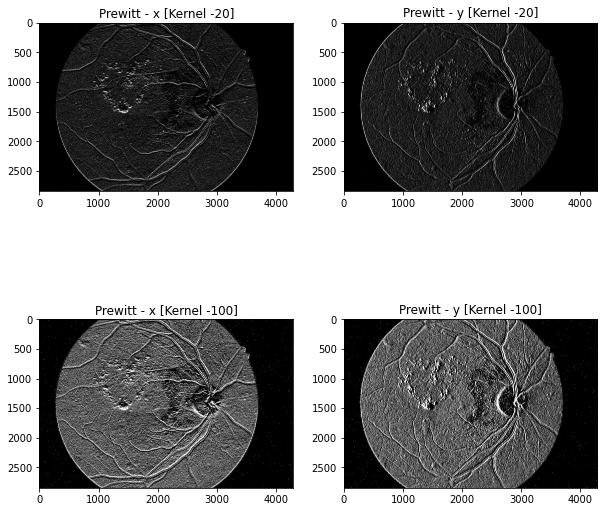

In [15]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0][0].imshow(img_prewittx, cmap="gray");
ax[0][1].imshow(img_prewitty, cmap="gray");
ax[1][0].imshow(img_prewittx1, cmap="gray");
ax[1][1].imshow(img_prewitty1, cmap="gray");


ax[0][0].set_title('Prewitt - x [Kernel -20]')
ax[0][1].set_title('Prewitt - y [Kernel -20]')
ax[1][0].set_title('Prewitt - x [Kernel -100]')
ax[1][1].set_title('Prewitt - y [Kernel -100]')


### Inference: The prewitt operator performed best when the kernel array has value 50. The object is visible and the edge is clearly demarcated

## Laplacian Operator for Edge Detection

In [16]:
kernel_size = 15
laplacian = cv2.Laplacian(gauss,cv2.CV_64F,ksize = kernel_size)

## Visualizing Laplacian edge detection for kernel = 15

Text(0.5, 1.0, 'Laplacian')

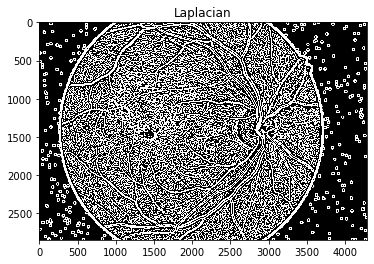

In [17]:
plt.imshow(laplacian,'gray',vmin=0,vmax=255)
plt.title("Laplacian")

## Comparing and Varying Parameters (Kernel)

In [26]:
laplacian1 = cv2.Laplacian(gauss,cv2.CV_64F,ksize = 5)
laplacian2 = cv2.Laplacian(gauss,cv2.CV_64F,ksize = 7)
laplacian3 = cv2.Laplacian(gauss,cv2.CV_64F,ksize = 9)
laplacian4 = cv2.Laplacian(gauss,cv2.CV_64F,ksize = 11)

In [27]:
titles = ['Laplacian Kernel Size: 5','Laplacian Kernel Size: 7','Laplacian Kernel Size: 9','Laplacian Kernel Size: 11']
images = [laplacian1,laplacian2,laplacian3,laplacian4]

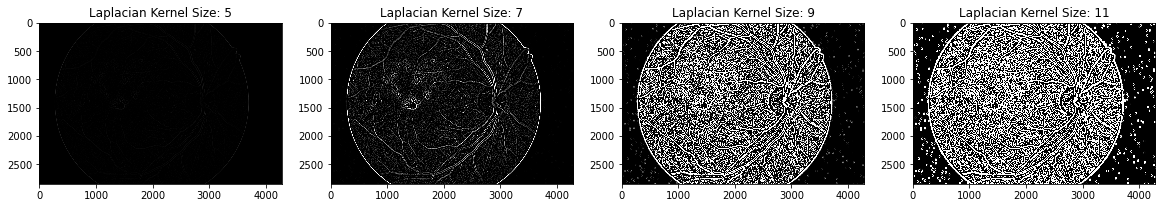

In [28]:
plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
plt.show()

### Inference: The laplacian operator starts to detect and show edges only after a kernel size of 7. 

## Canny Operator for Edge Detection

In [21]:
v = np.median(image)
sigma=1.5
#---- apply automatic Canny edge detection using the computed median----
lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edged = cv2.Canny(image, lower, upper) 

## Visualizing Canny operator for sigma = 1.5

Text(0.5, 1.0, 'Canny edge detection Sigma: 1.5')

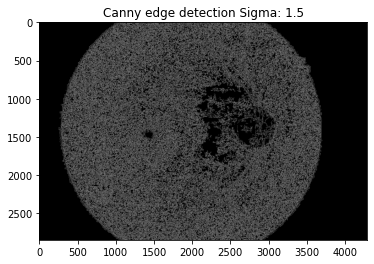

In [23]:
plt.imshow(edged, cmap='gray')
plt.title("Canny edge detection Sigma: 1.5")

## Comparing and Varying Parameters (Sigma)

In [24]:
def canny(n):
  v = np.median(image)
  sigma=n
  #---- apply automatic Canny edge detection using the computed median----
  lower = int(max(0, (1.0 - sigma) * v))
  upper = int(min(255, (1.0 + sigma) * v))
  edged = cv2.Canny(image, lower, upper)
  return edged
 

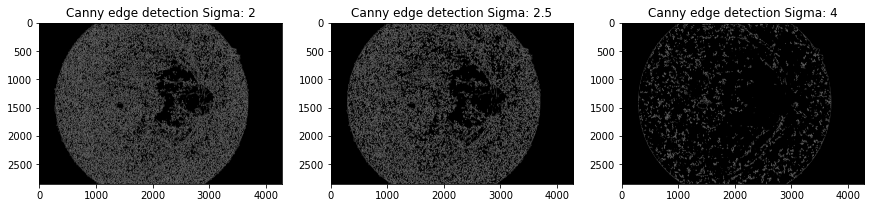

In [25]:
j=0
plt.figure(figsize=(20,20))
for i in [2,2.5,4]:
  ans = canny(i)
  plt.subplot(1,4,j+1),plt.imshow(ans,'gray')
  plt.title("Canny edge detection Sigma: "+str(i))
  j+=1

### Inference: The canny operator seems to does not detect the images better as the min and max threshold value increases, i.e., when value of sigma increases. Hence when the sigma value is 2, we can obtain a fair demarcation of edges 

## Conclusion

### Comparing all the edge detection techniques on the IDRiD dataset Prewitts operator with kernel 50 has performed the best in clearly identifying the edges. 